In [3]:
# 导入工具包 numpy pandas用于数据处理  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#读取数据，并删除前3列
df = pd.read_excel('data.xlsx')
df=df.iloc[:,1:]
df.tail()

,数管分系统/次,载荷分系统/次,电源分系统/次,姿态控制分系统/次,热控分系统/次,数传和测控分系统/次,推进分系统/次,故障类别
360,3,2,2,1,6,1,4,2
361,0,1,3,1,3,0,0,1
362,1,6,6,0,5,0,2,0
363,0,0,2,2,4,1,0,2
364,0,3,7,0,6,4,0,0


In [5]:
#删除数据的缺失值
df1=df.dropna()
df1.tail()

,数管分系统/次,载荷分系统/次,电源分系统/次,姿态控制分系统/次,热控分系统/次,数传和测控分系统/次,推进分系统/次,故障类别
360,3,2,2,1,6,1,4,2
361,0,1,3,1,3,0,0,1
362,1,6,6,0,5,0,2,0
363,0,0,2,2,4,1,0,2
364,0,3,7,0,6,4,0,0


In [6]:
#描述一下数据的统计信息，可以清楚的看到有没有异常值
df1.describe()

,数管分系统/次,载荷分系统/次,电源分系统/次,姿态控制分系统/次,热控分系统/次,数传和测控分系统/次,推进分系统/次,故障类别
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1.526027,1.597260,1.364384,0.536986,1.605479,1.430137,1.260274,0.506849
std,1.756466,1.556445,1.917629,0.862450,2.120795,1.584149,1.429933,0.661402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000
max,7.000000,7.000000,8.000000,3.000000,9.000000,4.000000,4.000000,2.000000


In [8]:
#划分特征 与 标签 展现下数据形状
df2=df1
y=df2['故障类别']
x=df2.drop(columns = ['故障类别'])
x.shape,y.shape

((365, 7), (365,))

In [9]:
#划分训练集测试集，取10%的测试集。
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(x,
                                                   y,
                                                   test_size = 0.1,
                                                   random_state = 0)
len(test_data)#看一下测试集长度

37

训练集:
预测正确数量,训练集样本量:
326 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       192
           1       1.00      0.98      0.99       105
           2       1.00      1.00      1.00        31

    accuracy                           0.99       328
   macro avg       1.00      0.99      1.00       328
weighted avg       0.99      0.99      0.99       328

混淆矩阵：
[[192   0   0]
 [  2 103   0]
 [  0   0  31]]
测试集:
预测正确数量,测试集样本量:
28 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.62      0.67      0.64        12
           2       0.25      0.33      0.29         3

    accuracy                           0.76        37
   macro avg       0.61      0.62      0.61        37
weighted avg       0.78      0.76      0.77        37

混淆矩阵：
[[19  3  0]
 [ 1  8  3]
 [ 0  2  1]]
在训练集上的预测效果:


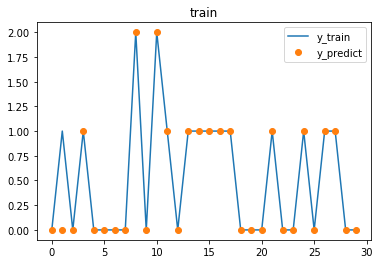

在测试集上的预测效果:


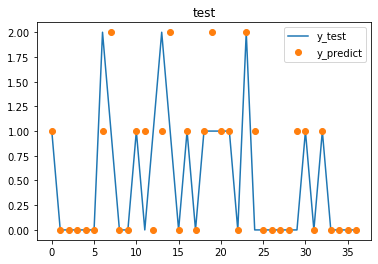

In [30]:
#决策树方法
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model=DecisionTreeClassifier()
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

训练集:
预测正确数量,训练集样本量:
282 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       192
           1       0.85      0.72      0.78       105
           2       0.93      0.45      0.61        31

    accuracy                           0.86       328
   macro avg       0.88      0.73      0.77       328
weighted avg       0.86      0.86      0.85       328

混淆矩阵：
[[192   0   0]
 [ 28  76   1]
 [  4  13  14]]
测试集:
预测正确数量,测试集样本量:
29 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.67      0.67      0.67        12
           2       0.00      0.00      0.00         3

    accuracy                           0.78        37
   macro avg       0.50      0.54      0.52        37
weighted avg       0.72      0.78      0.75        37

混淆矩阵：
[[21  1  0]
 [ 4  8  0]
 [ 0  3  0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


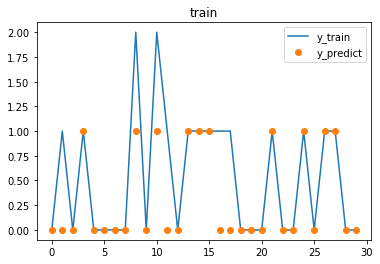

在测试集上的预测效果:


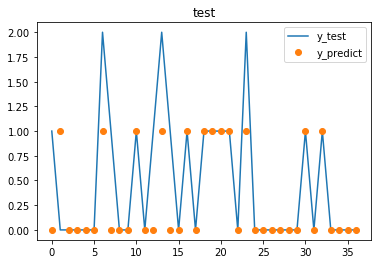

In [31]:
# 支持向量机SVM
from sklearn.svm import SVC  
model = SVC(gamma='auto') 
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

训练集:
预测正确数量,训练集样本量:
264 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       192
           1       0.70      0.68      0.69       105
           2       0.50      0.03      0.06        31

    accuracy                           0.80       328
   macro avg       0.69      0.57      0.56       328
weighted avg       0.77      0.80      0.77       328

混淆矩阵：
[[192   0   0]
 [ 33  71   1]
 [  0  30   1]]
测试集:
预测正确数量,测试集样本量:
32 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         3

    accuracy                           0.86        37
   macro avg       0.56      0.61      0.59        37
weighted avg       0.79      0.86      0.83        37

混淆矩阵：
[[22  0  0]
 [ 2 10  0]
 [ 0  3  0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


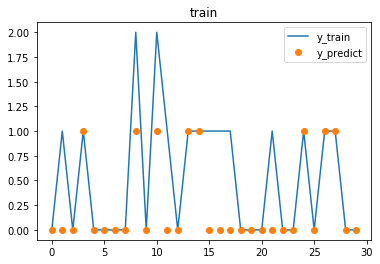

在测试集上的预测效果:


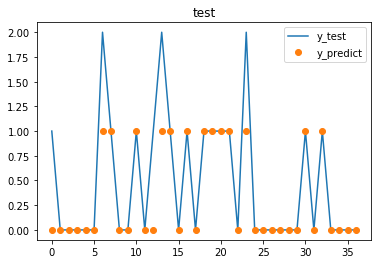

In [32]:
#线性支持向量机SVM
from sklearn.svm import LinearSVC
model = LinearSVC() 
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


训练集:
预测正确数量,训练集样本量:
266 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       192
           1       0.74      0.68      0.71       105
           2       1.00      0.10      0.18        31

    accuracy                           0.81       328
   macro avg       0.86      0.59      0.60       328
weighted avg       0.82      0.81      0.78       328

混淆矩阵：
[[192   0   0]
 [ 34  71   0]
 [  3  25   3]]
测试集:
预测正确数量,测试集样本量:
30 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       0.78      0.58      0.67        12
           2       1.00      0.33      0.50         3

    accuracy                           0.81        37
   macro avg       0.86      0.64      0.69        37
weighted avg       0.82      0.81      0.79        37

混淆矩阵：
[[22  0  0]
 [ 5  7  0]
 [ 0  2  1]]
在训练集上的预测效果:


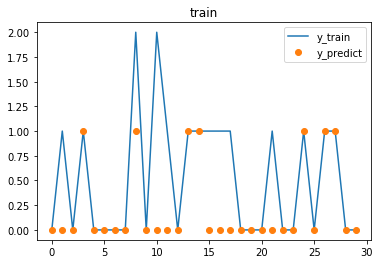

在测试集上的预测效果:


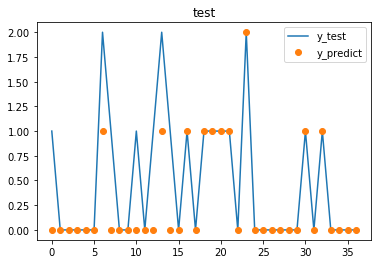

In [54]:
#随机森林方法
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


训练集:
预测正确数量,训练集样本量:
263 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       192
           1       0.70      0.67      0.68       105
           2       0.33      0.03      0.06        31

    accuracy                           0.80       328
   macro avg       0.63      0.57      0.55       328
weighted avg       0.76      0.80      0.76       328

混淆矩阵：
[[192   0   0]
 [ 33  70   2]
 [  0  30   1]]
测试集:
预测正确数量,测试集样本量:
32 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         3

    accuracy                           0.86        37
   macro avg       0.56      0.61      0.59        37
weighted avg       0.79      0.86      0.83        37

混淆矩阵：
[[22  0  0]
 [ 2 10  0]
 [ 0  3  0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


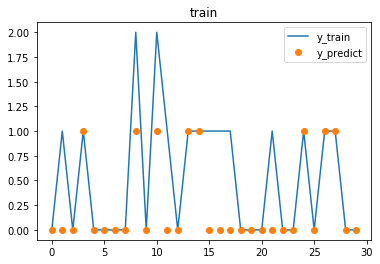

在测试集上的预测效果:


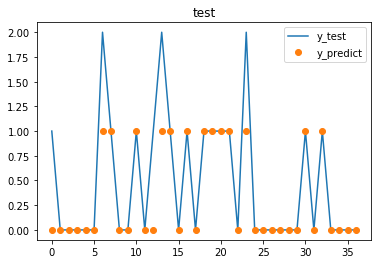

In [39]:
#logistic回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,multi_class='auto',l1_ratio=0.01)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


训练集:
预测正确数量,训练集样本量:
277 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       192
           1       0.82      0.66      0.73       105
           2       0.76      0.52      0.62        31

    accuracy                           0.84       328
   macro avg       0.81      0.72      0.76       328
weighted avg       0.84      0.84      0.83       328

混淆矩阵：
[[192   0   0]
 [ 31  69   5]
 [  0  15  16]]
测试集:
预测正确数量,测试集样本量:
32 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.82      0.75      0.78        12
           2       0.50      0.33      0.40         3

    accuracy                           0.86        37
   macro avg       0.74      0.69      0.71        37
weighted avg       0.85      0.86      0.85        37

混淆矩阵：
[[22  0  0]
 [ 2  9  1]
 [ 0  2  1]]
在训练集上的预测效果:


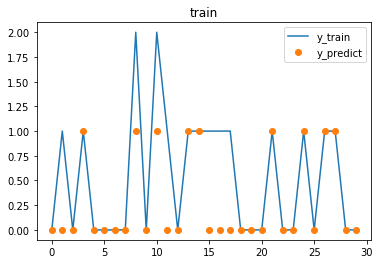

在测试集上的预测效果:


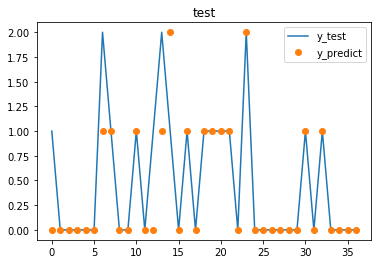

In [36]:
#神经网络分类方法
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


训练集:
预测正确数量,训练集样本量:
227 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       192
           1       0.64      0.33      0.44       105
           2       0.86      0.19      0.32        31

    accuracy                           0.69       328
   macro avg       0.73      0.50      0.52       328
weighted avg       0.69      0.69      0.65       328

混淆矩阵：
[[186   6   0]
 [ 69  35   1]
 [ 11  14   6]]
测试集:
预测正确数量,测试集样本量:
23 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        22
           1       0.50      0.33      0.40        12
           2       0.00      0.00      0.00         3

    accuracy                           0.62        37
   macro avg       0.39      0.40      0.39        37
weighted avg       0.57      0.62      0.58        37

混淆矩阵：
[[19  3  0]
 [ 7  4  1]
 [ 2  1  0]]
在训练集上的预测效果:


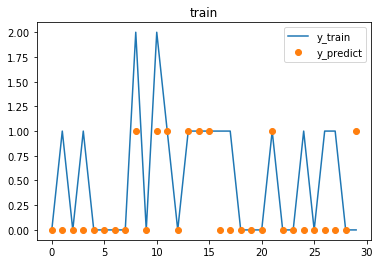

在测试集上的预测效果:


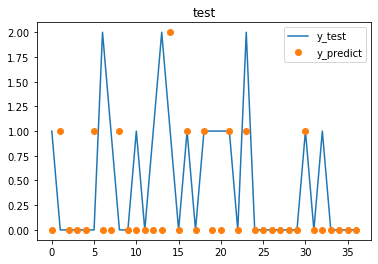

In [41]:
#限定半径最近邻分类树算法
from sklearn.neighbors import RadiusNeighborsClassifier
model = RadiusNeighborsClassifier(radius=3.0)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


训练集:
预测正确数量,训练集样本量:
246 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       192
           1       0.71      0.52      0.60       105
           2       0.86      0.19      0.32        31

    accuracy                           0.75       328
   macro avg       0.78      0.56      0.59       328
weighted avg       0.75      0.75      0.72       328

混淆矩阵：
[[185   7   0]
 [ 49  55   1]
 [ 10  15   6]]
测试集:
预测正确数量,测试集样本量:
30 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       0.78      0.58      0.67        12
           2       1.00      0.33      0.50         3

    accuracy                           0.81        37
   macro avg       0.86      0.64      0.69        37
weighted avg       0.82      0.81      0.79        37

混淆矩阵：
[[22  0  0]
 [ 5  7  0]
 [ 0  2  1]]
在训练集上的预测效果:


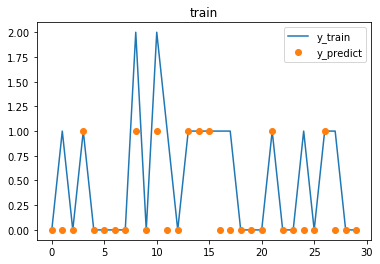

在测试集上的预测效果:


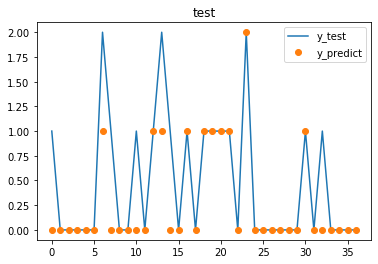

In [47]:
#knn k近邻分类算法
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


训练集:
预测正确数量,训练集样本量:
264 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       192
           1       0.74      0.61      0.67       105
           2       0.73      0.26      0.38        31

    accuracy                           0.80       328
   macro avg       0.77      0.62      0.65       328
weighted avg       0.79      0.80      0.78       328

混淆矩阵：
[[192   0   0]
 [ 38  64   3]
 [  1  22   8]]
测试集:
预测正确数量,测试集样本量:
30 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       0.86      0.50      0.63        12
           2       0.40      0.67      0.50         3

    accuracy                           0.81        37
   macro avg       0.71      0.72      0.69        37
weighted avg       0.83      0.81      0.80        37

混淆矩阵：
[[22  0  0]
 [ 3  6  3]
 [ 0  1  2]]
在训练集上的预测效果:


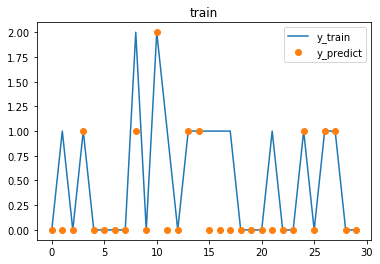

在测试集上的预测效果:


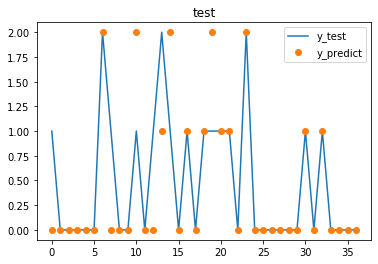

In [48]:
#梯度下降分类算法
from sklearn import linear_model
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


训练集:
预测正确数量,训练集样本量:
253 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       192
           1       0.69      0.58      0.63       105
           2       0.00      0.00      0.00        31

    accuracy                           0.77       328
   macro avg       0.50      0.53      0.51       328
weighted avg       0.69      0.77      0.72       328

混淆矩阵：
[[192   0   0]
 [ 43  61   1]
 [  3  28   0]]
测试集:
预测正确数量,测试集样本量:
30 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       0.73      0.67      0.70        12
           2       0.00      0.00      0.00         3

    accuracy                           0.81        37
   macro avg       0.52      0.56      0.54        37
weighted avg       0.74      0.81      0.77        37

混淆矩阵：
[[22  0  0]
 [ 4  8  0]
 [ 0  3  0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


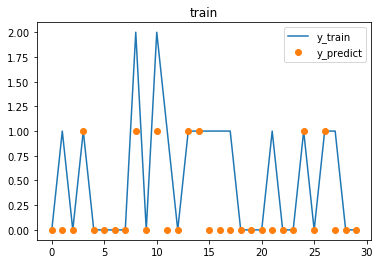

在测试集上的预测效果:


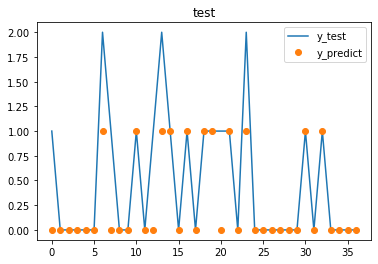

In [49]:
#ridge分类算法
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


训练集:
预测正确数量,训练集样本量:
255 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       192
           1       0.64      0.69      0.66       105
           2       0.50      0.03      0.06        31

    accuracy                           0.78       328
   macro avg       0.66      0.56      0.54       328
weighted avg       0.75      0.78      0.74       328

混淆矩阵：
[[182  10   0]
 [ 32  72   1]
 [  0  30   1]]
测试集:
预测正确数量,测试集样本量:
30 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.73      0.67      0.70        12
           2       0.00      0.00      0.00         3

    accuracy                           0.81        37
   macro avg       0.55      0.56      0.55        37
weighted avg       0.78      0.81      0.79        37

混淆矩阵：
[[22  0  0]
 [ 2  8  2]
 [ 0  3  0]]
在训练集上的预测效果:


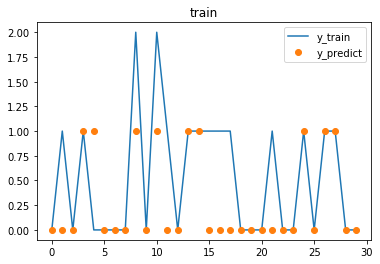

在测试集上的预测效果:


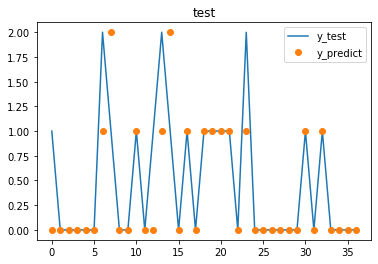

In [50]:
#PA被动感知分类算法
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=1000, random_state=0,
tol=1e-3)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

训练集:
预测正确数量,训练集样本量:
264 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       192
           1       0.70      0.69      0.69       105
           2       0.00      0.00      0.00        31

    accuracy                           0.80       328
   macro avg       0.52      0.56      0.54       328
weighted avg       0.72      0.80      0.76       328

混淆矩阵：
[[192   0   0]
 [ 33  72   0]
 [  0  31   0]]
测试集:
预测正确数量,测试集样本量:
32 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         3

    accuracy                           0.86        37
   macro avg       0.56      0.61      0.59        37
weighted avg       0.79      0.86      0.83        37

混淆矩阵：
[[22  0  0]
 [ 2 10  0]
 [ 0  3  0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


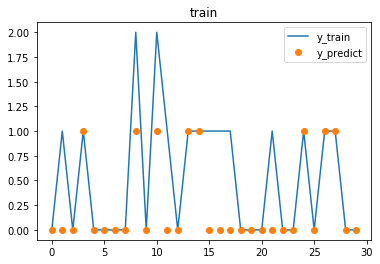

在测试集上的预测效果:


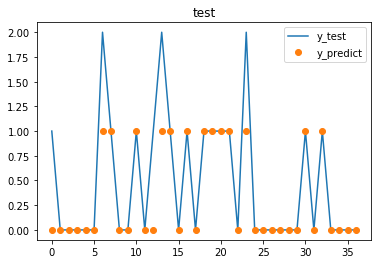

In [62]:
#使用adaboost分类算法
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

训练集:
预测正确数量,训练集样本量:
326 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       192
           1       1.00      0.98      0.99       105
           2       1.00      1.00      1.00        31

    accuracy                           0.99       328
   macro avg       1.00      0.99      1.00       328
weighted avg       0.99      0.99      0.99       328

混淆矩阵：
[[192   0   0]
 [  2 103   0]
 [  0   0  31]]
测试集:
预测正确数量,测试集样本量:
31 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.75      0.75      0.75        12
           2       0.50      0.33      0.40         3

    accuracy                           0.84        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.83      0.84      0.83        37

混淆矩阵：
[[21  1  0]
 [ 2  9  1]
 [ 0  2  1]]
在训练集上的预测效果:


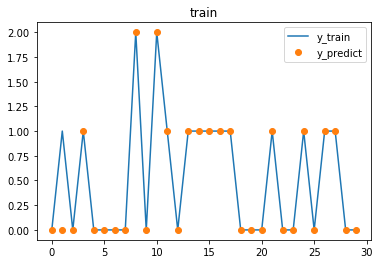

在测试集上的预测效果:


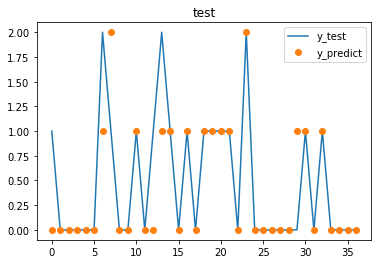

In [64]:
#极度随机树分类算法
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


训练集:
预测正确数量,训练集样本量:
274 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       192
           1       0.79      0.68      0.73       105
           2       0.92      0.35      0.51        31

    accuracy                           0.84       328
   macro avg       0.85      0.68      0.72       328
weighted avg       0.84      0.84      0.82       328

混淆矩阵：
[[192   0   0]
 [ 33  71   1]
 [  1  19  11]]
测试集:
预测正确数量,测试集样本量:
32 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       0.82      0.75      0.78        12
           2       1.00      0.33      0.50         3

    accuracy                           0.86        37
   macro avg       0.90      0.69      0.74        37
weighted avg       0.87      0.86      0.85        37

混淆矩阵：
[[22  0  0]
 [ 3  9  0]
 [ 0  2  1]]
在训练集上的预测效果:


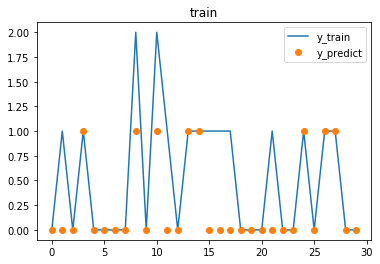

在测试集上的预测效果:


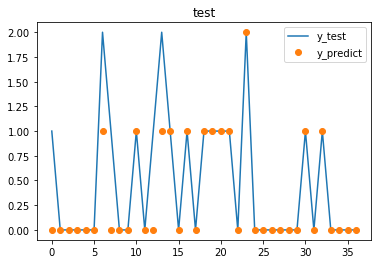

In [60]:
#用上面三种效果最好的算法集成 得到的投票分类算法
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf2 = MLPClassifier()
clf3 = KNeighborsClassifier(n_neighbors=7)
model = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')#hard
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\ne

训练集:
预测正确数量,训练集样本量:
277 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       192
           1       0.82      0.67      0.74       105
           2       0.76      0.52      0.62        31

    accuracy                           0.84       328
   macro avg       0.82      0.73      0.76       328
weighted avg       0.84      0.84      0.83       328

混淆矩阵：
[[191   1   0]
 [ 30  70   5]
 [  1  14  16]]
测试集:
预测正确数量,测试集样本量:
31 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.75      0.75      0.75        12
           2       1.00      0.33      0.50         3

    accuracy                           0.84        37
   macro avg       0.88      0.68      0.72        37
weighted avg       0.84      0.84      0.83        37

混淆矩阵：
[[21  1  0]
 [ 3  9  0]
 [ 0  2  1]]
在训练集上的预测效果:


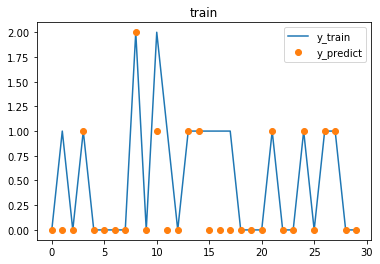

在测试集上的预测效果:


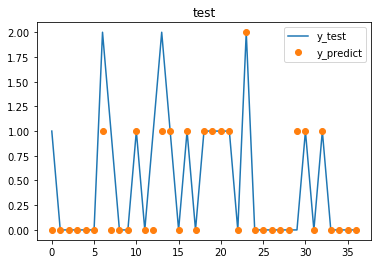

In [65]:
#使用bagging的集成策略分类 元分类器是感知机
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=MLPClassifier(),
                        n_estimators=10, random_state=0)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

E:\anoconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


训练集:
预测正确数量,训练集样本量:
286 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       192
           1       0.90      0.71      0.80       105
           2       0.95      0.61      0.75        31

    accuracy                           0.87       328
   macro avg       0.90      0.78      0.82       328
weighted avg       0.88      0.87      0.86       328

混淆矩阵：
[[192   0   0]
 [ 29  75   1]
 [  4   8  19]]
测试集:
预测正确数量,测试集样本量:
31 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       0.80      0.67      0.73        12
           2       1.00      0.33      0.50         3

    accuracy                           0.84        37
   macro avg       0.88      0.67      0.71        37
weighted avg       0.84      0.84      0.82        37

混淆矩阵：
[[22  0  0]
 [ 4  8  0]
 [ 0  2  1]]
在训练集上的预测效果:


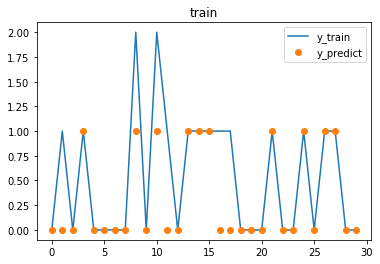

在测试集上的预测效果:


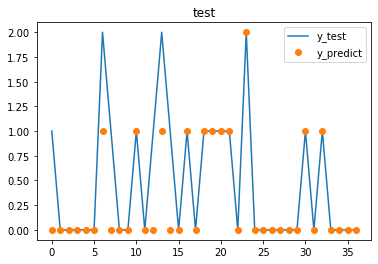

In [67]:
#使用OneVsRest多分类算法 元分类器是svm
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(SVC())
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


训练集:
预测正确数量,训练集样本量:
269 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       192
           1       0.76      0.68      0.71       105
           2       1.00      0.19      0.32        31

    accuracy                           0.82       328
   macro avg       0.87      0.62      0.65       328
weighted avg       0.83      0.82      0.79       328

混淆矩阵：
[[192   0   0]
 [ 34  71   0]
 [  2  23   6]]
测试集:
预测正确数量,测试集样本量:
31 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       0.80      0.67      0.73        12
           2       1.00      0.33      0.50         3

    accuracy                           0.84        37
   macro avg       0.88      0.67      0.71        37
weighted avg       0.84      0.84      0.82        37

混淆矩阵：
[[22  0  0]
 [ 4  8  0]
 [ 0  2  1]]
在训练集上的预测效果:


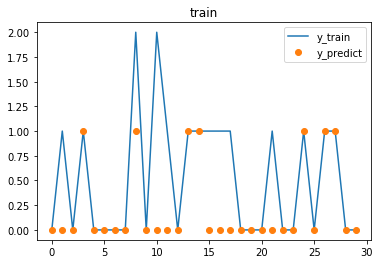

在测试集上的预测效果:


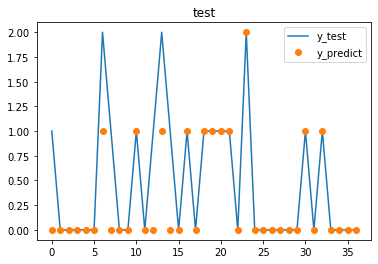

In [68]:
#使用OneVsRest多分类算法 元分类器是随机森林
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(RandomForestClassifier(max_depth=2, random_state=0))
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

训练集:
预测正确数量,训练集样本量:
263 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       192
           1       0.70      0.67      0.68       105
           2       0.33      0.03      0.06        31

    accuracy                           0.80       328
   macro avg       0.63      0.57      0.55       328
weighted avg       0.76      0.80      0.76       328

混淆矩阵：
[[192   0   0]
 [ 33  70   2]
 [  0  30   1]]
测试集:
预测正确数量,测试集样本量:
32 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         3

    accuracy                           0.86        37
   macro avg       0.56      0.61      0.59        37
weighted avg       0.79      0.86      0.83        37

混淆矩阵：
[[22  0  0]
 [ 2 10  0]
 [ 0  3  0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


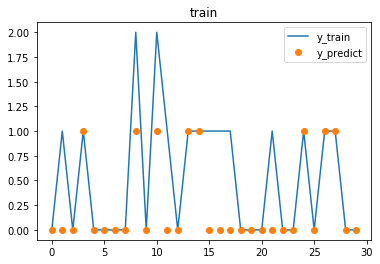

在测试集上的预测效果:


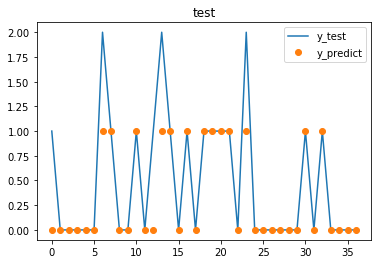

In [70]:
#使用OneVsRest多分类算法 元分类器是logistic回归
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression(random_state=0))
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

E:\anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


训练集:
预测正确数量,训练集样本量:
264 328
精确度等指标：
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       192
           1       0.70      0.68      0.69       105
           2       0.50      0.03      0.06        31

    accuracy                           0.80       328
   macro avg       0.69      0.57      0.56       328
weighted avg       0.77      0.80      0.77       328

混淆矩阵：
[[192   0   0]
 [ 33  71   1]
 [  0  30   1]]
测试集:
预测正确数量,测试集样本量:
32 37
精确度等指标：
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.77      0.83      0.80        12
           2       0.00      0.00      0.00         3

    accuracy                           0.86        37
   macro avg       0.56      0.61      0.59        37
weighted avg       0.79      0.86      0.83        37

混淆矩阵：
[[22  0  0]
 [ 2 10  0]
 [ 0  3  0]]
在训练集上的预测效果:


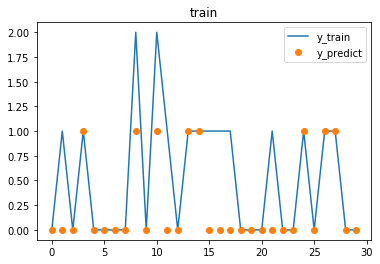

在测试集上的预测效果:


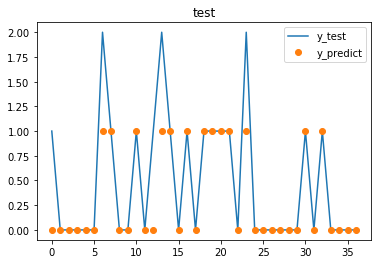

In [72]:
#使用OneVsRest多分类算法 元分类器是线性SVM
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(LinearSVC())
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels.values[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels.values) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

In [75]:
#LSTM神经网络分类算法 较麻烦 且效果不好 可以不看
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.utils import np_utils 
feanum=8
window=5
stock=df1
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度5+1
result = []
for index in range(len(data) - sequence_length):#循环170-5次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到161个样本，样本形式为6天*3特征
row = round(0.9 * result.shape[0])#划分训练集测试集
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]
#reshape成 5天*3特征
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

d = 0.01
model = Sequential()
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=False))
model.add(Activation('relu'))
#model.add(Dropout(d))
#model.add(LSTM(8, return_sequences=False))
#model.add(Activation('relu'))
#model.add(Dropout(d))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch = 50, batch_size = 64) #训练模型1000次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
E:\anoconda\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
E:\anoconda\lib\site-packages\ipykernel_launcher.py:42: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/50
323/323 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6667
Epoch 2/50
323/323 [==============================] - 0s 65us/step - loss: 0.6099 - accuracy: 0.6667
Epoch 3/50
323/323 [==============================] - 0s 49us/step - loss: 0.5992 - accuracy: 0.6687
Epoch 4/50
323/323 [==============================] - 0s 71us/step - loss: 0.5900 - accuracy: 0.6687
Epoch 5/50
323/323 [==============================] - 0s 56us/step - loss: 0.5822 - accuracy: 0.6646
Epoch 6/50
323/323 [==============================] - 0s 59us/step - loss: 0.5742 - accuracy: 0.6656
Epoch 7/50
323/323 [==============================] - 0s 59us/step - loss: 0.5678 - accuracy: 0.6636
Epoch 8/50
323/323 [==============================] - 0s 59us/step - loss: 0.5611 - accuracy: 0.6625
Epoch 9/50
323/323 [==============================] - 0s 65us/step - loss: 0.5554 - accuracy: 0.6811
Epoch 10/50
323/323 [==============================] - 0s 66us/step - loss: 0.5505 - accurac

In [76]:
predict_target=model.predict(X_train)
predict_target=predict_target.argmax(axis=1)
train_labels=y_train.argmax(axis=1)
print(sum(predict_target == train_labels))
print(metrics.classification_report(train_labels,predict_target))
print(metrics.confusion_matrix(train_labels,predict_target))
predict_target=model.predict(X_test)
predict_target=predict_target.argmax(axis=1)
test_labels=y_test.argmax(axis=1)
print(sum(predict_target == test_labels))
print(metrics.classification_report(test_labels,predict_target))
print(metrics.confusion_matrix(test_labels,predict_target))

188
              precision    recall  f1-score   support

           0       0.59      0.98      0.73       189
           1       0.43      0.03      0.05       108
           2       0.00      0.00      0.00        26

    accuracy                           0.58       323
   macro avg       0.34      0.34      0.26       323
weighted avg       0.49      0.58      0.45       323

[[185   4   0]
 [105   3   0]
 [ 26   0   0]]
22
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        21
           1       1.00      0.14      0.25         7
           2       0.00      0.00      0.00         8

    accuracy                           0.61        36
   macro avg       0.53      0.38      0.33        36
weighted avg       0.54      0.61      0.49        36

[[21  0  0]
 [ 6  1  0]
 [ 8  0  0]]
